In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('time-series-19-covid-combined.csv')

In [3]:
data.sample(5)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
8790,2020-04-09,China,Inner Mongolia,44.0935,113.9448,126.0,79.0,1.0
1176,2020-04-18,Australia,New South Wales,-33.8688,151.2093,2936.0,1379.0,26.0
8282,2020-03-16,China,Henan,33.8820,113.6140,1273.0,1250.0,22.0
22693,2020-03-28,Netherlands,NaN,52.1326,5.2913,9762.0,3.0,639.0
13847,2020-03-15,Ethiopia,NaN,9.1450,40.4897,1.0,0.0,0.0


In [15]:
data.isnull().sum()

Date              0
Country/Region    0
Lat               0
Long              0
Confirmed         0
Recovered         0
Deaths            0
dtype: int64

In [14]:
data = data.fillna(0)

In [5]:
data.drop(columns=['Province/State'], inplace=True)

In [16]:
#Parsing the 'Date' feature to a date datatype 
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True) 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32307 entries, 0 to 32306
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            32307 non-null  datetime64[ns]
 1   Country/Region  32307 non-null  object        
 2   Lat             32307 non-null  float64       
 3   Long            32307 non-null  float64       
 4   Confirmed       32307 non-null  float64       
 5   Recovered       32307 non-null  float64       
 6   Deaths          32307 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.7+ MB


In [18]:
Nigeria_data = data[data['Country/Region']=='Nigeria']

In [19]:
Nigeria_data.head()

,Date,Country/Region,Lat,Long,Confirmed,Recovered,Deaths
23595,2020-01-22,Nigeria,9.082,8.6753,0.0,0.0,0.0
23596,2020-01-23,Nigeria,9.082,8.6753,0.0,0.0,0.0
23597,2020-01-24,Nigeria,9.082,8.6753,0.0,0.0,0.0
23598,2020-01-25,Nigeria,9.082,8.6753,0.0,0.0,0.0
23599,2020-01-26,Nigeria,9.082,8.6753,0.0,0.0,0.0


Text(0, 0.5, 'Cummulative')

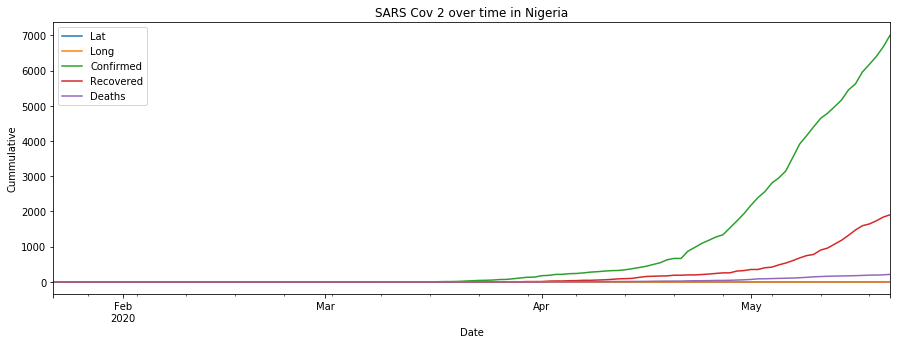

In [20]:
Nigeria_data.plot(x='Date',figsize=(15,5), title='SARS Cov 2 over time in Nigeria')
plt.ylabel('Cummulative')

In [21]:
y = Nigeria_data.set_index('Date')

In [22]:
y.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21'],
              dtype='datetime64[ns]', name='Date', length=121, freq=None)

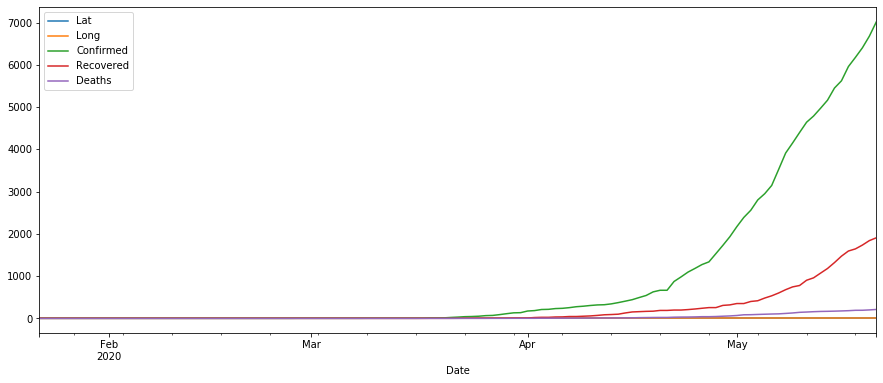

In [23]:
y.plot(figsize=(15, 6))
plt.show()

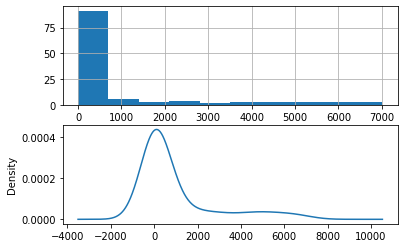

In [25]:
plt.figure(1)
plt.subplot(211)
y.Confirmed.hist()
plt.subplot(212)
y.Confirmed.plot(kind='kde')
plt.show()

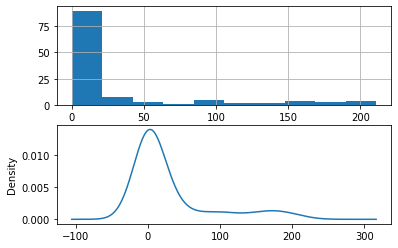

In [19]:
pyplot.figure(1)
pyplot.subplot(211)
y.Deaths.hist()
pyplot.subplot(212)
y.Deaths.plot(kind='kde')
pyplot.show()

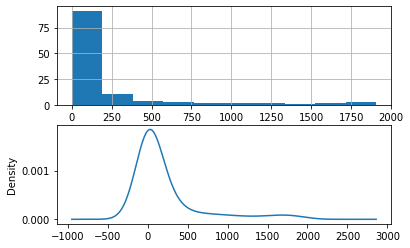

In [20]:
pyplot.figure(1)
pyplot.subplot(211)
y.Recovered.hist()
pyplot.subplot(212)
y.Recovered.plot(kind='kde')
pyplot.show()

In [26]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA

In [28]:
y.drop(columns=['Country/Region'], inplace=True)

In [29]:
y =y.dropna()

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

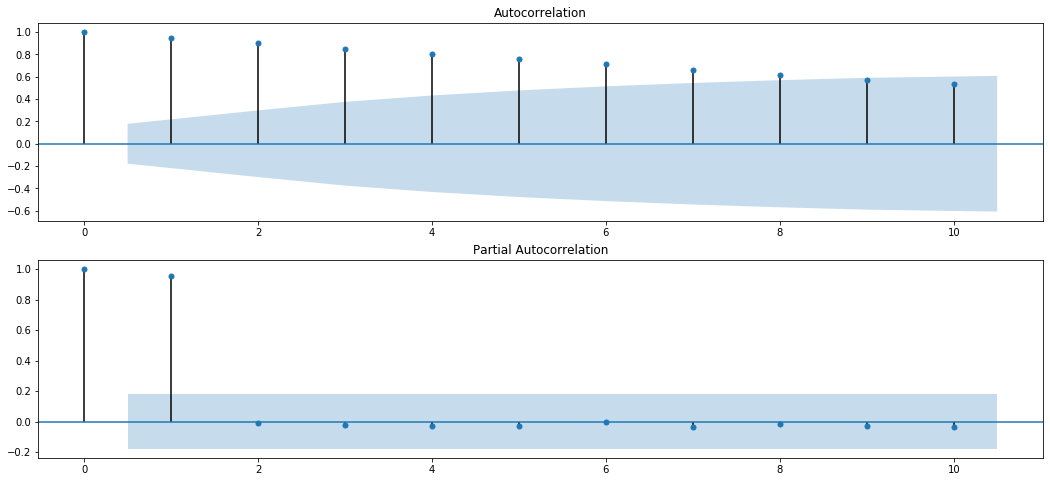

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(y.Confirmed, ax=plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(y.Confirmed, ax=plt.gca(), lags = 10)
plt.show()

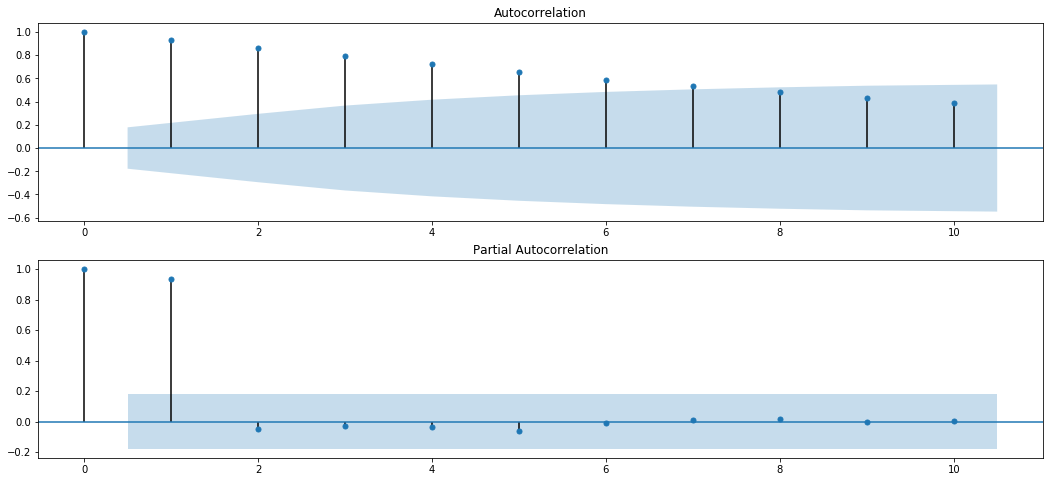

In [34]:
plt.figure()
plt.subplot(211)
plot_acf(y.Recovered, ax=plt.gca(), lags = 10)
plt.subplot(212)
plot_pacf(y.Recovered, ax=plt.gca(), lags = 10)
plt.show()